In [8]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from fastNeuron.layers import Dense
from fastNeuron.network import neural_network
from sklearn.model_selection import train_test_split
import fastNeuron.Optimizers as Optimizers
import fastNeuron.loss_funcs as losses
import fastNeuron.Activation_funcs as activations

In [9]:
# load the data
def load_data():
    with open('data/heart.csv') as file:
        reader = csv.reader(file)
        headers = next(reader)
        data = np.array(list(reader) , dtype= np.float64)
# seperate input and labels
# last column is the labels
    Y = data[:,-1]
    # remove labels from data
    X = data[:,:-1]
    # normalize the data
    # i will be dividing each value with the max value in the column
    X = X / X.max(axis=0)
    return headers,X,Y


In [10]:
# split data into train and test 
headers, X , Y = load_data()
x_train , x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# reshape lables arrays
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [11]:
# define M and N for training samples
M = x_train.shape[0]
N = x_train.shape[1]

In [12]:
# create a model
model = neural_network()

# compile model
model.compile(
    optimizer=Optimizers.MiniBatchGradientDescent(),
    Cost=losses.BinaryCrossEntropy()
)

# create the layers of the model
model.sequential(
    [
        Dense(N,10,activations.relu()),
        Dense(10,1,activations.sigmoid())
    ]
)

In [13]:
# train the model
model, costs = model.fit(x_train,y_train,0.0001,10000)

0 cost : 0.9815491200602355 accuracy : 48.35%
1000 cost : 0.34406840351529117 accuracy : 86.36%
2000 cost : 0.3261822465188724 accuracy : 87.19%
3000 cost : 0.3071793769034897 accuracy : 86.78%
4000 cost : 0.2919142281023214 accuracy : 86.78%
5000 cost : 0.2836722837947203 accuracy : 88.43%
6000 cost : 0.2770925439500318 accuracy : 90.08%
7000 cost : 0.27111555676254306 accuracy : 90.91%
8000 cost : 0.2650035963126686 accuracy : 90.5%
9000 cost : 0.25942880157219517 accuracy : 91.32%
 cost : 0.2539736020762078 accuracy : 91.32%


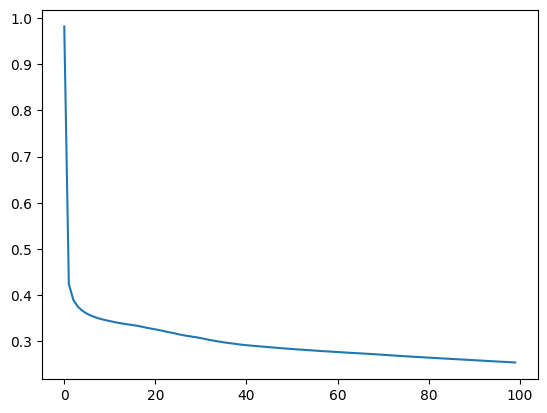

In [14]:
plt.plot(costs)

In [15]:
accuracy = ((x_test.shape[0] - np.sum((model.predict(x_test) != y_test).astype(int))) / x_test.shape[0] ) * 100

In [16]:
accuracy

80.32786885245902